In [158]:
import pickle
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
X_train_ = np.load('X_train.npz')
X_test_ = np.load('X_test.npz')
Y_train_ = np.load('Y_train.npz')

In [3]:
X_train = X_train_['arr_0'] 

In [4]:
X_test = X_test_['arr_0']
Y_train = Y_train_['arr_0']

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(47500, 10000)
(47500, 3)
(2500, 10000)


In [6]:
train_pre = preprocessing.normalize(np.concatenate([X_train,X_test]))
X_train_pre = train_pre[:47500,:]
X_test_pre = train_pre[47500:,:]


In [7]:
train_pre.shape

(50000, 10000)

* w is 300 for penetration_rate, 1 for mesh_size and 200 for alpha
* value_1 is the penatration rate 
* value_2 is the mesh_size 
* value_3 is the alpha

In [39]:
Y_train_p = Y_train[:,0]
Y_train_m = Y_train[:,1]
Y_train_a = Y_train[:,2]

In [9]:
X_train[0]

array([ 4.94275118e-05,  8.60909660e-05,  1.18854234e-04, ...,
       -3.63163865e-03, -3.20763078e-03, -3.11630909e-03])

### EDA

##### MSD

In [55]:
summery_MSD = pd.DataFrame(X_train[:,:5000],columns=['time'+str(i) for i in range(5000)]).describe()
summery_MSD

,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time4990,time4991,time4992,time4993,time4994,time4995,time4996,time4997,time4998,time4999
count,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,...,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000
mean,0.000050,0.000085,0.000117,0.000147,0.000176,0.000204,0.000231,0.000257,0.000283,0.000309,...,0.097453,0.097473,0.097492,0.097512,0.097531,0.097550,0.097570,0.097589,0.097608,0.097628
std,0.000001,0.000008,0.000017,0.000027,0.000037,0.000047,0.000057,0.000068,0.000079,0.000090,...,0.066586,0.066600,0.066614,0.066628,0.066643,0.066657,0.066671,0.066685,0.066699,0.066713
min,0.000041,0.000063,0.000079,0.000094,0.000106,0.000118,0.000128,0.000138,0.000147,0.000155,...,0.001424,0.001424,0.001424,0.001424,0.001424,0.001424,0.001424,0.001425,0.001425,0.001426
25%,0.000050,0.000078,0.000102,0.000124,0.000144,0.000163,0.000181,0.000198,0.000215,0.000231,...,0.041958,0.041966,0.041976,0.041983,0.041989,0.041996,0.042005,0.042012,0.042019,0.042025
50%,0.000050,0.000085,0.000116,0.000145,0.000173,0.000200,0.000225,0.000251,0.000275,0.000299,...,0.082603,0.082618,0.082633,0.082648,0.082662,0.082676,0.082687,0.082700,0.082716,0.082731
75%,0.000051,0.000092,0.000131,0.000168,0.000205,0.000241,0.000276,0.000311,0.000345,0.000379,...,0.140885,0.140912,0.140944,0.140976,0.140998,0.141030,0.141054,0.141083,0.141106,0.141127
max,0.000052,0.000103,0.000155,0.000208,0.000260,0.000313,0.000365,0.000417,0.000469,0.000521,...,0.406826,0.406922,0.407018,0.407114,0.407210,0.407306,0.407402,0.407499,0.407595,0.407691


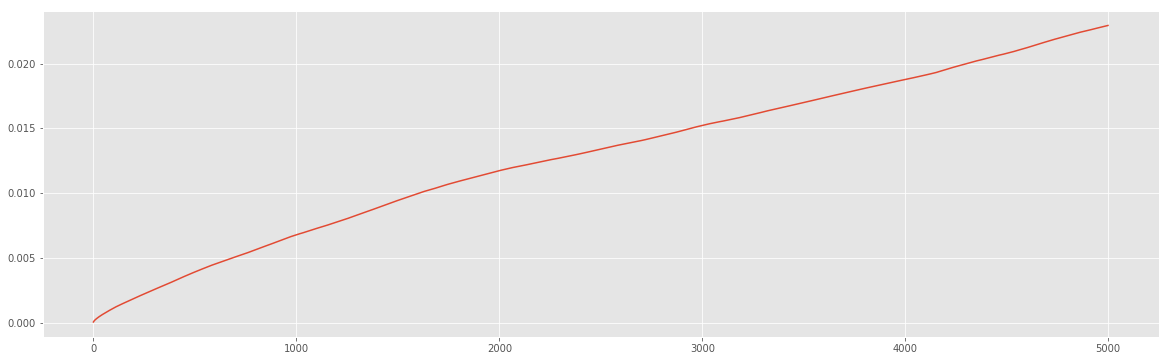

In [145]:
# MSD linear(表示在這5000時間中沒有碰撞物)
# 大部分呈線性，但仍有一點小小的彎曲
plt.figure(figsize=(20,6))
plt.plot(X_train[10][:5000])
plt.show()

In [149]:
class MSD_Line:
    def __init__(self,MSD):
        self.y = MSD
        self.slope = None
        self.bias = MSD[:,0].reshape((-1,1))
        self.x = np.array([i for i in range(5000)]*MSD.shape[0]).reshape((MSD.shape[0],-1))
        self.error = None
        self.error_abs = None
        self.error_square = None
        
    def get_MSDLine(self):
        self.slope = (self.y[:,4999] - self.y[:,0])/ 5000
        self.slope = self.slope.reshape((-1,1))
    def get_error(self):
        y = self.slope*self.x + self.bias
        self.error = self.y - y
        self.error_abs = np.abs(self.error)
        self.error_square = np.square(self.error)

In [ ]:
msd_Line = MSD_Line(X_train[:,:5000])
msd_Line.get_MSDLine()
msd_Line.get_error()
msd_error = msd_Line.error
msd_error_abs = msd_Line.error_abs
msd_error_square = msd_Line.error_square
print(msd_error.shape)

(47500, 5000)


In [153]:
summery_MSD_err = pd.DataFrame(msd_error,columns=['time'+str(i) for i in range(5000)]).describe()
summery_MSD_err

,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time4990,time4991,time4992,time4993,time4994,time4995,time4996,time4997,time4998,time4999
count,47500.0,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,...,4.750000e+04,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,47500.000000,4.750000e+04,4.750000e+04
mean,0.0,0.000016,0.000028,0.000038,0.000048,0.000056,0.000063,0.000071,0.000077,0.000083,...,2.069740e-05,0.000021,0.000020,0.000020,0.000020,0.000020,0.000020,0.000020,1.964763e-05,1.951555e-05
std,0.0,0.000008,0.000014,0.000021,0.000027,0.000033,0.000039,0.000044,0.000050,0.000055,...,4.015473e-05,0.000036,0.000032,0.000028,0.000024,0.000020,0.000017,0.000015,1.332157e-05,1.334266e-05
min,0.0,-0.000033,-0.000067,-0.000102,-0.000137,-0.000172,-0.000208,-0.000243,-0.000278,-0.000315,...,-2.224746e-04,-0.000191,-0.000159,-0.000127,-0.000096,-0.000064,-0.000033,-0.000005,8.165881e-08,2.757749e-07
25%,0.0,0.000012,0.000021,0.000028,0.000035,0.000040,0.000045,0.000050,0.000054,0.000058,...,4.988782e-07,0.000002,0.000003,0.000004,0.000005,0.000006,0.000007,0.000008,8.617479e-06,8.394960e-06
50%,0.0,0.000018,0.000032,0.000043,0.000054,0.000063,0.000072,0.000080,0.000087,0.000094,...,1.368234e-05,0.000014,0.000014,0.000014,0.000014,0.000014,0.000015,0.000016,1.664065e-05,1.653620e-05
75%,0.0,0.000021,0.000038,0.000052,0.000065,0.000077,0.000088,0.000098,0.000108,0.000117,...,3.672860e-05,0.000035,0.000033,0.000032,0.000030,0.000029,0.000028,0.000028,2.813375e-05,2.821541e-05
max,0.0,0.000043,0.000084,0.000125,0.000165,0.000204,0.000242,0.000279,0.000316,0.000353,...,3.225781e-04,0.000293,0.000263,0.000232,0.000201,0.000171,0.000140,0.000113,9.211005e-05,8.152810e-05


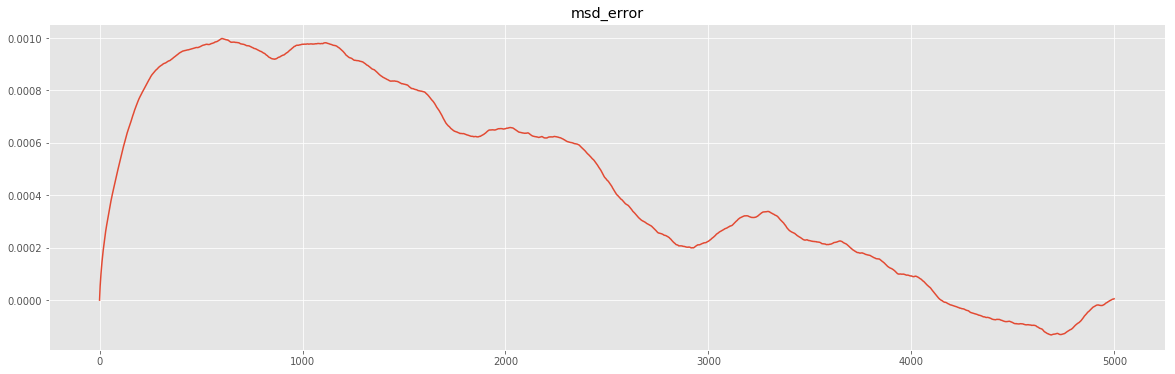

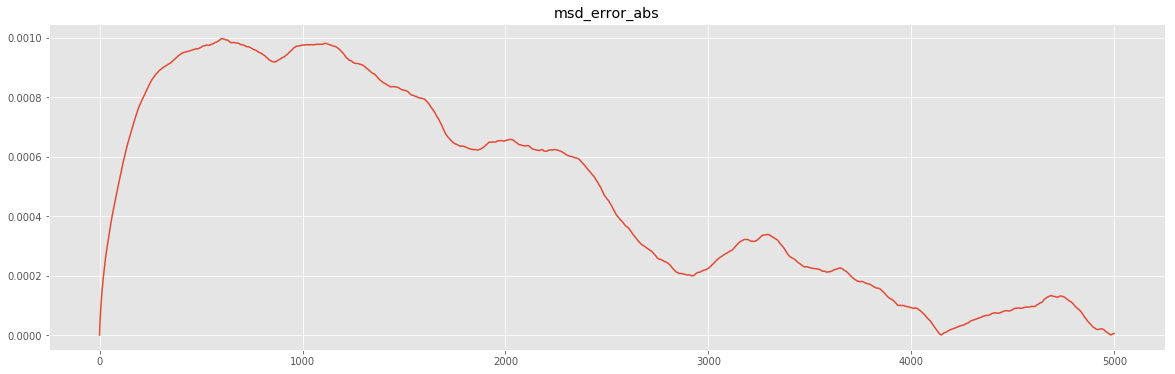

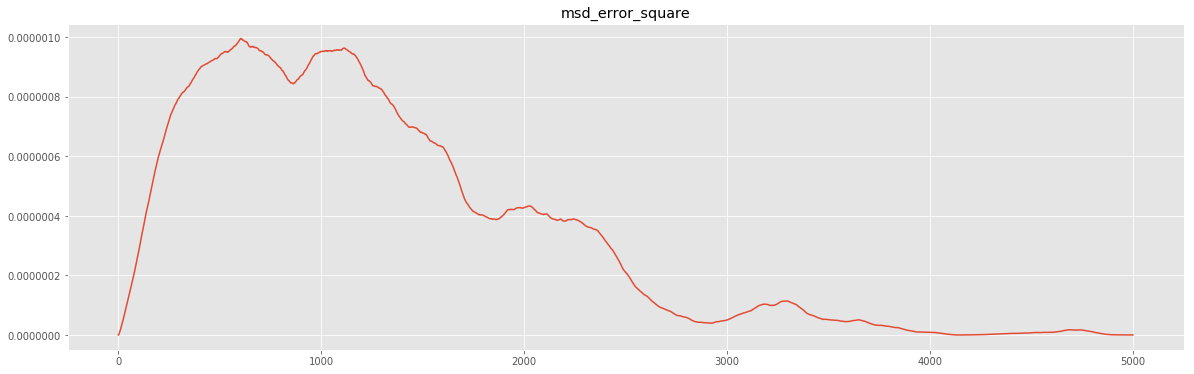

In [155]:
idx = 1
plt.figure(figsize=(20,6))
plt.title('msd_error')
plt.plot(msd_error[idx])
plt.show()

plt.figure(figsize=(20,6))
plt.title('msd_error_abs')
plt.plot(msd_error_abs[idx])
plt.show()

plt.figure(figsize=(20,6))
plt.title('msd_error_square')
plt.plot(msd_error_square[idx])
plt.show()

##### VAC

In [82]:
summery_VAC = pd.DataFrame([X_train[0][5000+x:5000+x+100] for x in range(0,5000,100)],columns=['time'+str(i) for i in range(100)]).describe()
summery_VAC

,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time90,time91,time92,time93,time94,time95,time96,time97,time98,time99
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.999969,0.866402,0.782411,0.714696,0.658522,0.607687,0.561043,0.519529,0.481107,0.445021,...,-0.002347,-0.000981,0.000256,0.001920,0.002535,0.004330,0.006313,0.008739,0.009112,0.008602
std,0.000021,0.178044,0.228381,0.257175,0.272887,0.283615,0.290740,0.293477,0.294072,0.293243,...,0.002356,0.002523,0.002751,0.003052,0.003666,0.003863,0.004019,0.004247,0.004417,0.004824
min,0.999931,-0.128491,-0.135477,-0.133953,-0.129210,-0.127585,-0.128392,-0.125757,-0.125475,-0.124246,...,-0.009828,-0.008853,-0.007698,-0.006565,-0.006176,-0.005451,-0.004554,-0.003632,-0.003208,-0.003116
25%,0.999951,0.872169,0.776453,0.690157,0.610562,0.532869,0.455875,0.380825,0.305938,0.230655,...,-0.003442,-0.001802,-0.000792,0.001002,0.000810,0.002868,0.005179,0.008012,0.008045,0.006197
50%,0.999970,0.925680,0.870403,0.820584,0.774813,0.730317,0.686851,0.645009,0.603442,0.562478,...,-0.001917,-0.000435,0.000764,0.002583,0.003539,0.005407,0.007777,0.010563,0.010561,0.009648
75%,0.999987,0.946042,0.905771,0.869748,0.837169,0.805837,0.774898,0.745137,0.715946,0.687065,...,-0.000492,0.001070,0.002392,0.004139,0.005208,0.007028,0.009072,0.011238,0.012571,0.012970
max,0.999999,0.957593,0.926188,0.898188,0.872625,0.847735,0.823276,0.799965,0.776771,0.753893,...,0.000187,0.001859,0.003751,0.005726,0.006869,0.008804,0.010651,0.012655,0.013329,0.013434


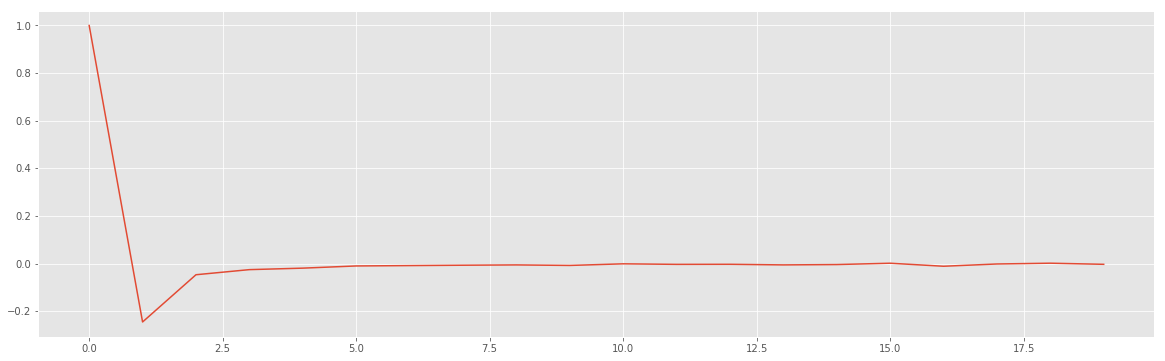

In [156]:
# VAC for one group(50 groups)
# 一開始因為time interval不動，所以自相關係數為1（完全相關），但time interval稍微提升一點點可以看到自相關係數轉成負數
# 而當interval太大時，基本上就沒走什麼相關性了
plt.figure(figsize=(20,6))
plt.plot(X_train[156][5000:5020])
plt.show()

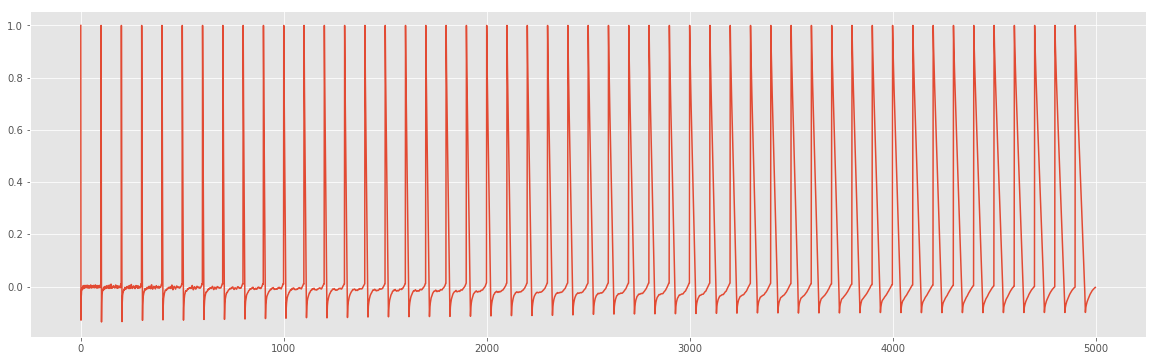

In [69]:
plt.figure(figsize=(20,6))
plt.plot(X_train[0][5000:])
plt.show()

##### Alpha

In [51]:
pd.DataFrame(Y_train_a,columns=['alpha']).describe()

,alpha
count,47500.000000
mean,0.749719
std,0.143919
min,0.500035
25%,0.624887
50%,0.751707
75%,0.873909
max,0.999896


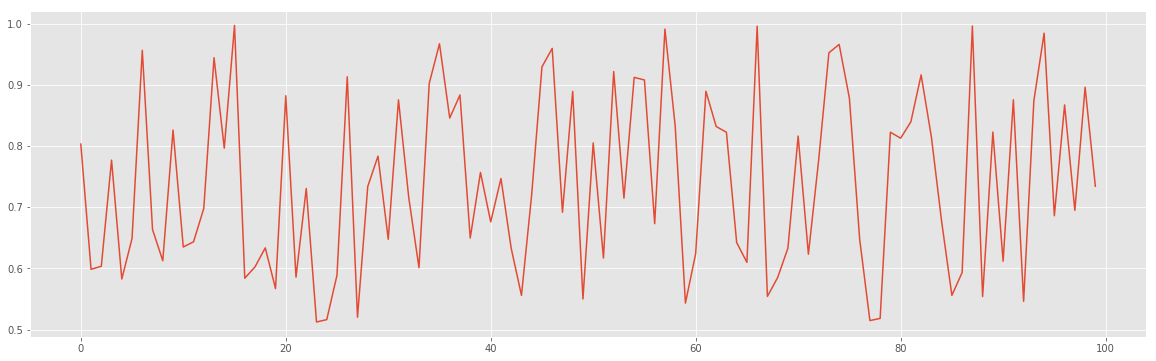

In [41]:
# alpha 0.5~1 (若他為H，則表示此運動均為正相關，且都是long term memory)
plt.figure(figsize=(20,6))
plt.plot(Y_train_a[:100])
plt.show()

##### mesh size

In [63]:
pd.DataFrame(Y_train_m,columns=['mesh_size']).describe()

,mesh_size
count,47500.000000
mean,137.616182
std,65.108089
min,25.010878
25%,81.045489
50%,138.498665
75%,194.172346
max,249.963839


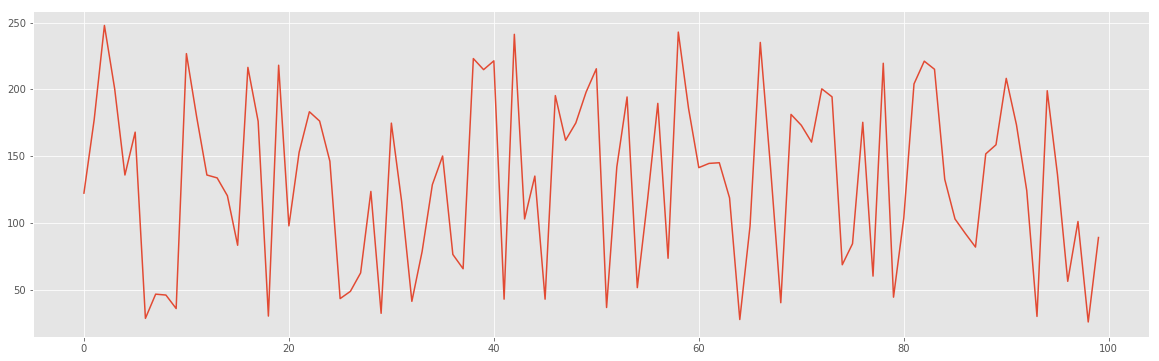

In [64]:
# mesh size 
plt.figure(figsize=(20,6))
plt.plot(Y_train_m[:100])
plt.show()

##### peneration rate

In [65]:
pd.DataFrame(Y_train_p,columns=['peneration_rate']).describe()

,peneration_rate
count,47500.000000
mean,0.496567
std,0.289391
min,0.000072
25%,0.245903
50%,0.494967
75%,0.747978
max,0.999971


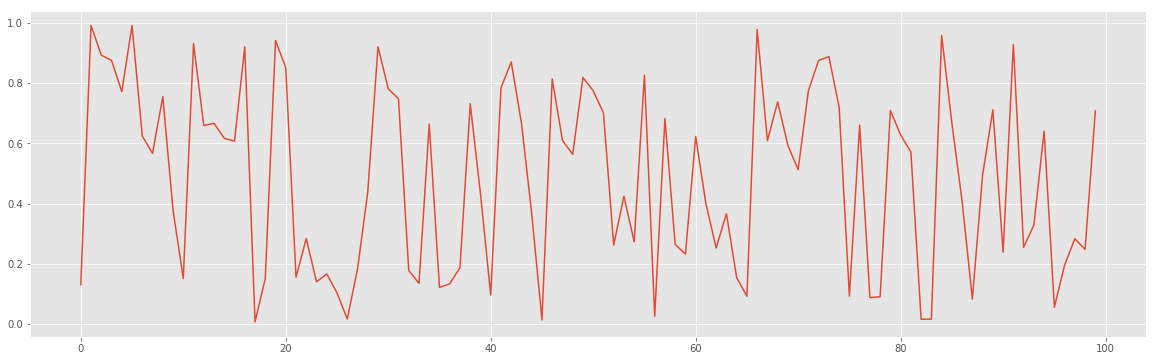

In [66]:
# peneration rate 0~1
plt.figure(figsize=(20,6))
plt.plot(Y_train_p[:100])
plt.show()